**Q Learning**
$$
Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha \left[ r_t + \gamma Q(s_{t+1}, a_{t+1}) - Q(s_t, a_t) \right]
$$


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Training the model...
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.4     |
|    ep_rew_mean     | 22.4     |
| time/              |          |
|    fps             | 1185     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 26.5        |
|    ep_rew_mean          | 26.5        |
| time/                   |             |
|    fps                  | 864         |
|    iterations           | 2           |
|    time_elapsed         | 4           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008590322 |
|    clip_fraction        | 0.0891      |
|    clip_range           | 0.2         

C:\Users\lyl\AppData\Local\pypoetry\Cache\virtualenvs\llm-reinforce-learning-4zX6vMtc-py3.12\Lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Evaluation results: Mean reward = 456.10, Std deviation = 88.04
Test completed! Total reward: 304.00, Total steps: 304


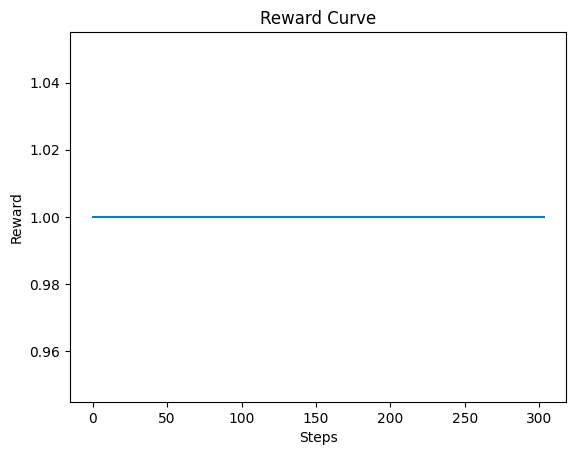

In [1]:
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy
import matplotlib.pyplot as plt

# 1. Create the environment
env = gym.make("CartPole-v1")

# 2. Initialize the PPO model
model = PPO("MlpPolicy", env, verbose=1)

# 3. Train the model
print("Training the model...")
model.learn(total_timesteps=10000)
print("Training completed!")

# 4. Evaluate the trained model
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10)
print(f"Evaluation results: Mean reward = {mean_reward:.2f}, Std deviation = {std_reward:.2f}")

# 5. Use the trained model for prediction
obs, info = env.reset()  # Reset the environment
rewards = []  # Store rewards
steps = 0  # Track the number of steps

while True:
    action, _states = model.predict(obs)  # Predict the action
    obs, reward, done, truncated, info = env.step(action)  # Take the action
    rewards.append(reward)  # Store the reward
    steps += 1
    if done or truncated:  # End the loop if the episode is done or truncated
        break

print(f"Test completed! Total reward: {sum(rewards):.2f}, Total steps: {steps}")

# 6. Plot the reward curve
plt.plot(rewards)
plt.xlabel("Steps")
plt.ylabel("Reward")
plt.title("Reward Curve")
plt.show()
